Using Least square error for simulation

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def real_func(x):
    return np.sin(2*np.pi*x)
def fit_func(p,x):
    f=np.poly1d(p)#p是多项式系数
    return f(x)
def residuals_func(p,x,y):
    ret=fit_func(p,x)-y
    return ret

In [ ]:
####补充说明leastsq
Xi=np.array([8,19,2.72,6.39,8.71,4.7,2.66,3.78])
Yi=np.array([7.01,2.78,6.47,6.71,4.1,4.23,4.05])
#需要拟合的函数func及误差error
def func(p,x):
    k,b=p
    return k*x+b
def error(p,x,y,s):
    print s
    return func(p,x)-y
#TEST
p0=[100,2]
#print (error(p0,Xi,Yi))
###主函数
s="Test the number of iteration"
Para=leastsq(error,p0,args=(Xi,Yi,s))#把error函数中除了p以外的参数打包到args中

In [3]:
#十个点
x=np.linspace(0,1,10)
x_points=np.linspace(0,1,1000)
y_=real_func(x)
y=[np.random.normal(0,0.1)+y1 for y1 in y_]
def fitting(M=0):
    p_init=np.random.rand(M+1)
    p_lsq=leastsq(residuals_func,p_init,args=(x,y))
    print('Fitting Parameters:',p_lsq[0])
    
    #可视化
    plt.plot(x_points,real_func(x_points),label='real')
    plt.plot(x_points,fit_func(p_lsq[0],x_points),label='fitted curve')
    plt.plot(x,y,'bo',label='noise')
    plt.legend()
    return p_lsq

Fitting Parameters: [0.05062221]


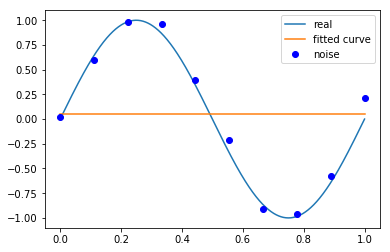

In [4]:
p_lsq_0=fitting(M=0)

Fitting Parameters: [ 22.28955366 -33.25240021  11.28027554  -0.08113966]


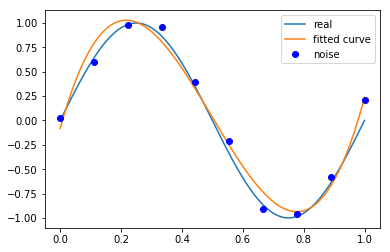

In [5]:
#M=3
p_lsq_0=fitting(M=3)

Fitting Parameters: [ 2.27800050e+04 -1.01749183e+05  1.90776524e+05 -1.95037595e+05
  1.18044289e+05 -4.28477035e+04  8.96927350e+03 -9.82849666e+02
  4.74287563e+01  2.32396079e-02]


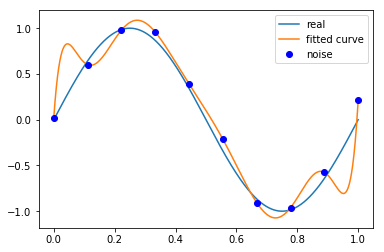

In [11]:
#M=9
p_lsq_9=fitting(M=9)#overfitting

In [7]:
#regularizer正则化项
regularization = 0.0001
def residuals_func_regularization(p,x,y):
    ret=fit_func(p,x)-y
    ret=np.append(ret,np.sqrt(0.5*regularization*np.square(p)))
    return ret

In [8]:
p_init=np.random.rand(9+1)
p_lsq_regularization=leastsq(residuals_func_regularization,p_init,args=(x,y))

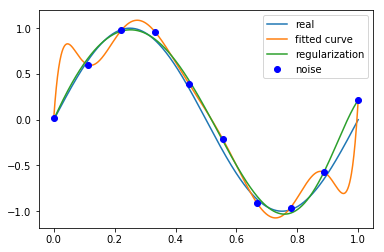

In [12]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(x_points, fit_func(p_lsq_regularization[0], x_points), label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()